In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import dipy.reconst.sfm as sfm
import dipy.reconst.csdeconv as csd
import dipy.reconst.dti as dti
import dipy.core.gradients as grad

In [3]:
import utils
from model import Model, BiExponentialIsotropicModel

In [4]:
data = utils.read_data()

In [5]:
train_data = data['seen']['signal'][:, 0][::2]
train_bvals = data['seen']['bvals'][::2]
train_bvecs = data['seen']['bvecs'][::2]
train_delta = data['seen']['delta'][::2]
train_Delta = data['seen']['Delta'][::2]
train_te = data['seen']['TE'][::2]
train_g = data['seen']['g'][::2]

test_data = data['seen']['signal'][:, 0][1::2]
test_bvals = data['seen']['bvals'][1::2]
test_bvecs = data['seen']['bvecs'][1::2]
test_delta = data['seen']['delta'][1::2]
test_Delta = data['seen']['Delta'][1::2]
test_te = data['seen']['TE'][1::2]
test_g = data['seen']['g'][1::2]


#test_data = train_data
#test_bvals = train_bvals
#test_bvecs = train_bvecs
#test_delta = train_delta 
#test_Delta = train_Delta 
#test_te = train_te 
#test_g = train_g


In [6]:
train_gtab = grad.gradient_table(train_bvals, train_bvecs, big_delta=train_Delta, small_delta=train_delta)
test_gtab = grad.gradient_table(test_bvals, test_bvecs, big_delta=test_Delta, small_delta=test_delta)

In [7]:
train_s0 = train_data[train_gtab.b0s_mask]

In [8]:
import sklearn.linear_model as lm
#model = sfm.SparseFascicleModel(train_gtab, isotropic=sfm.ExponentialIsotropicModel)
#model = dti.TensorModel(train_gtab)
model = Model(train_gtab, isotropic=BiExponentialIsotropicModel, solver=lm.ElasticNet(l1_ratio=0.1, alpha=0.000000001, positive=True, warm_start=True, max_iter=25000, 
                                                                                      fit_intercept=True, normalize=True))

In [9]:
fit = model.fit(train_data, TE=train_te)

In [10]:
debug

ERROR: No traceback has been produced, nothing to debug.


In [11]:
predict= fit.predict(test_gtab, test_te)

In [12]:
debug

ERROR: No traceback has been produced, nothing to debug.


In [13]:
np.unique(train_Delta)

array([   0.,   17.,   19.,   20.,   21.,   23.,   37.,   38.,   39.,
         40.,   44.,   56.,   63.,   66.,   76.,   79.,   80.,   81.,
         82.,   87.,   95.,  100.,  102.,  109.,  113.,  114.,  119.,
        120.,  121.,  130.])

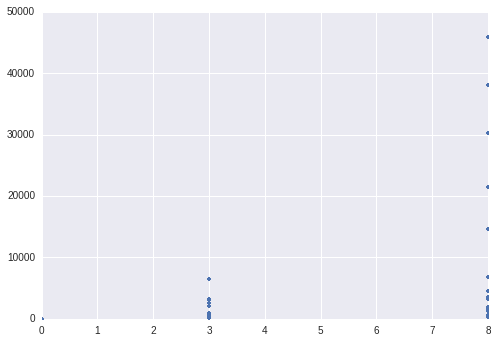

In [14]:
plt.plot(train_delta, train_gtab.bvals, '.')

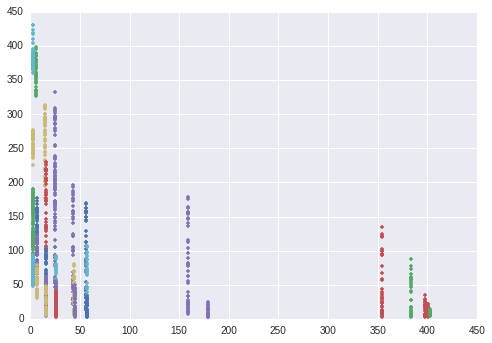

In [15]:
fig, ax = plt.subplots(1)
for this_Delta in np.unique(train_Delta):
    idx = train_Delta==this_Delta
    ax.plot(train_gtab.bvals[idx]/this_Delta, train_data[idx], '.', label=this_Delta)

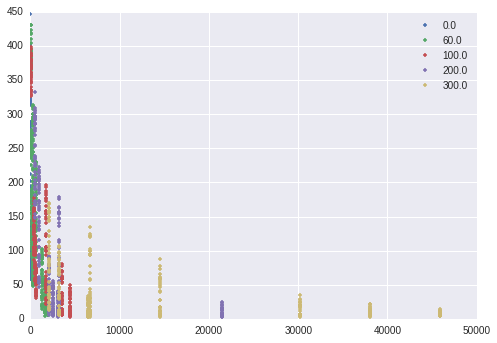

In [16]:
fig, ax = plt.subplots(1)
for this_g in np.unique(train_g):
    idx = train_g==this_g
    ax.plot(train_gtab.bvals[idx], train_data[idx], '.', label=this_g)
plt.legend()

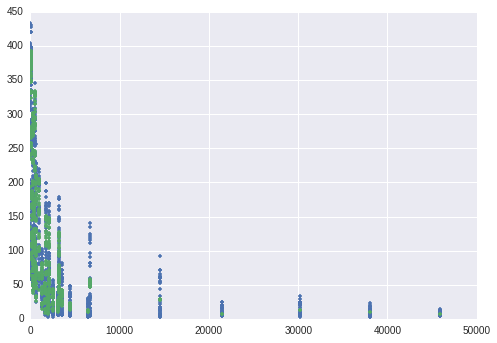

In [17]:
plt.plot(test_gtab.bvals, test_data, '.')
plt.plot(test_gtab.bvals, predict, '.')

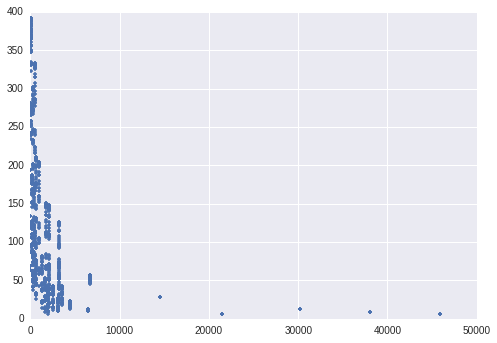

In [18]:
plt.plot(test_gtab.bvals, predict, '.')

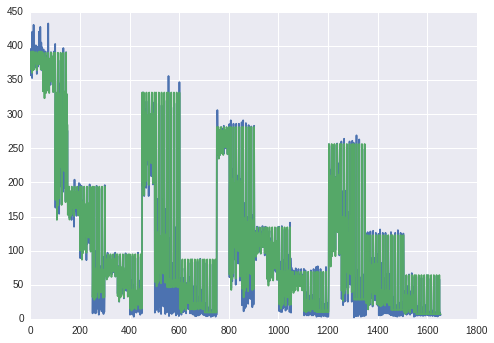

In [19]:
plt.plot(test_data)
plt.plot(predict)

In [20]:
utils.LSE(predict, test_data)

3.1908150261712684

In [21]:
np.unique(test_Delta).shape

(30,)

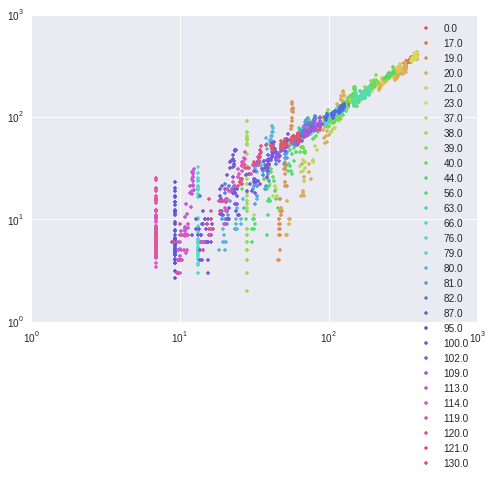

In [22]:
with sns.color_palette("hls", 30):
    fig, ax = plt.subplots(1)
    for this_Delta in np.unique(test_Delta):
        idx = test_Delta==this_Delta
        ax.plot(predict[idx], test_data[idx], '.', label=this_Delta)
        ax.invert_xaxis()
        ax.invert_yaxis()
        plt.plot([0, 450], [0, 450], 'k--')
        ax.loglog()
    plt.legend()

In [23]:
fit.beta[np.where(fit.beta>0)]

array([  9.85298011e-01,   2.41418715e-04,   8.35435352e-02,
         2.90883304e-01,   2.01965449e+00,   9.79398903e-03,
         1.69241819e-04])

In [24]:
import dipy.viz.projections as proj

In [25]:
import dipy.data as dpd

In [26]:
s = dpd.get_sphere()

In [27]:
fit.beta.shape

(1810,)

ImportError: No module named basemap

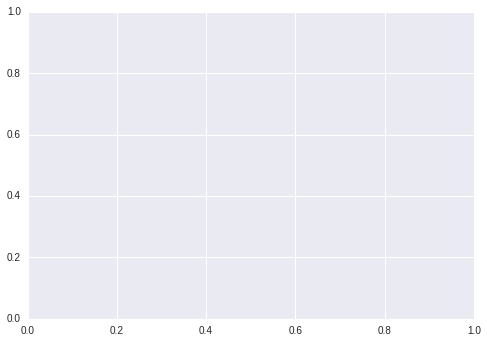

In [28]:
proj.sph_project(s.vertices.T, fit.beta, vmax=0.3)

In [ ]:
fit.te_params

In [ ]:
proj.sph_project(s.vertices.T, fit.odf(s), vmax=0.3)

In [ ]:
plt.plot(test_Delta, test_te, 'o')
plt.xlabel('$\Delta$')